# UNI variate 

In [ ]:
##  how to remove values  
## using simple imputer 
# reamoving the date is known as CCA  complete case analysis 


In [ ]:
## ASSUMPTION FOR CCA  
##  1. missing completely  at random 
## generlly it is done when the data is missing less than 5 percentage of the total data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [3]:
df = pd.read_csv('data_science_job.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [9]:
df.shape

(19158, 13)

In [10]:
cols = [var for var in df.columns if df[var].isnull().mean()*100 < 5 and df[var].isnull().mean()*100 > 0 ]

In [11]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [12]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
1010,0.897,no_enrollment,Masters,20.0,90.0
3814,0.897,no_enrollment,Masters,6.0,121.0
15990,0.836,no_enrollment,Primary School,1.0,9.0
9274,0.855,no_enrollment,Graduate,11.0,150.0
17638,0.920,no_enrollment,Graduate,20.0,304.0


In [13]:
# firstly we have to check , how much data will we remain if we remove the the nan values  
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [14]:
new_df = df[cols].dropna()

In [15]:
new_df.shape

(17182, 5)

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

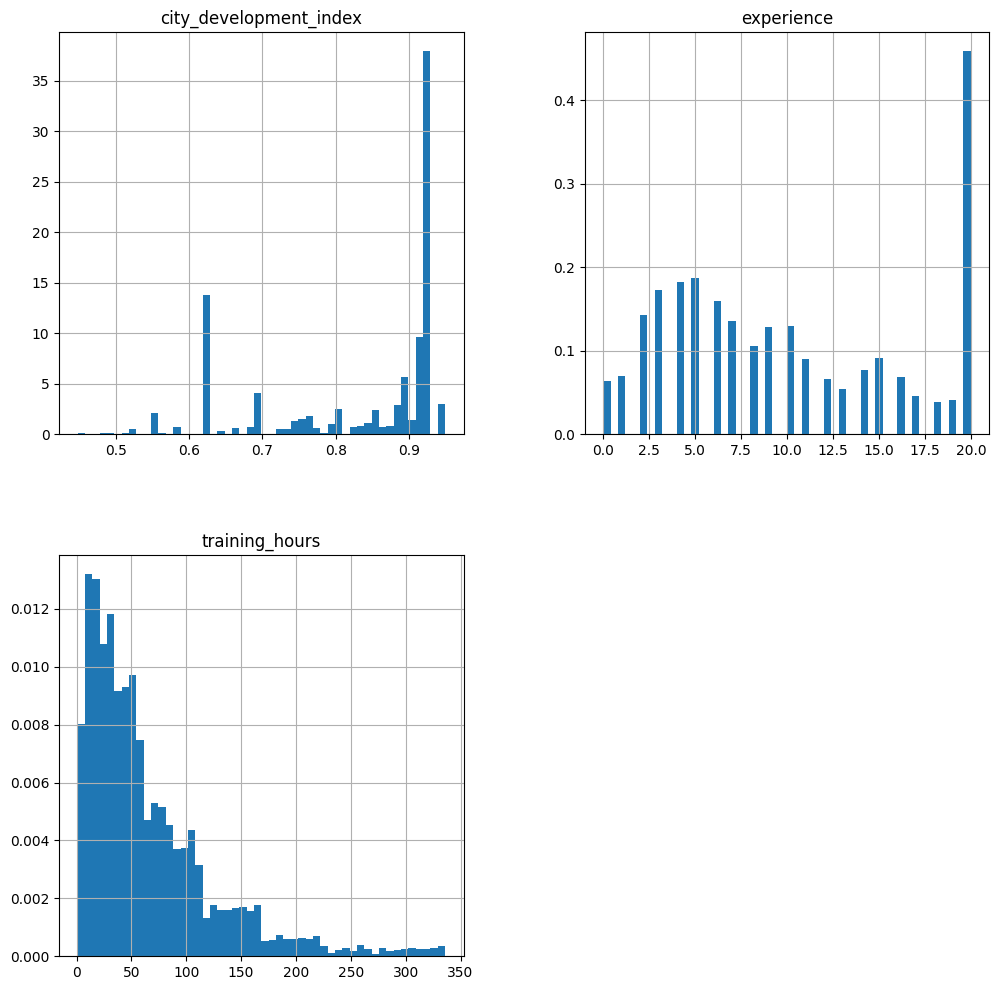

In [17]:
new_df.hist(bins = 50 , density  =True , figsize = (12,12))

<Axes: >

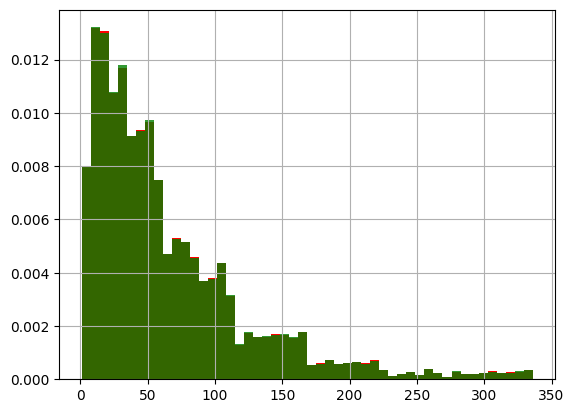

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

## original data 
df['training_hours'].hist(bins = 50 ,ax = ax , density  =True  ,color = 'red')

## after using CCA  
new_df['training_hours'].hist(bins = 50 ,ax = ax , density  =True  ,color = 'green',alpha = 0.8)


<Axes: ylabel='Density'>

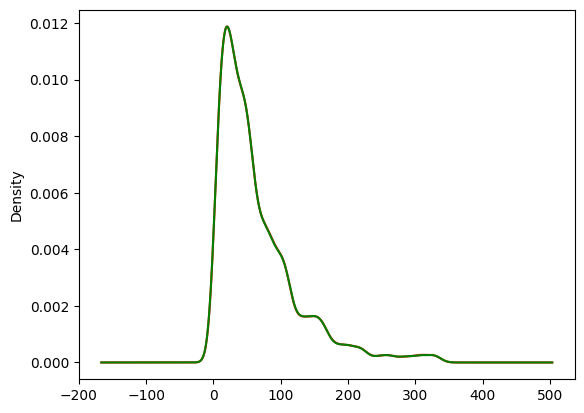

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

## original data 
df['training_hours'].plot.density(color = 'red')

## after using CCA  
new_df['training_hours'].plot.density(color = 'green')


<Axes: >

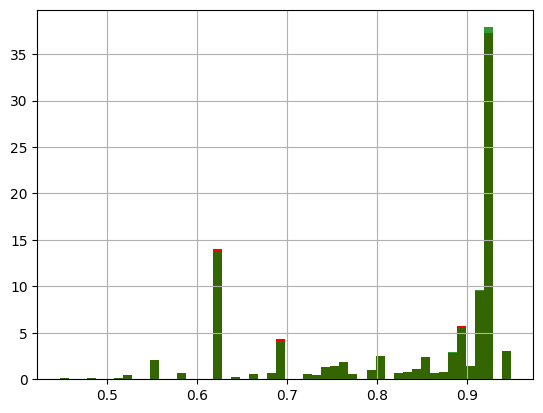

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

## original data 
df['city_development_index'].hist(bins = 50 ,ax = ax , density  =True  ,color = 'red')

## after using CCA  
new_df['city_development_index'].hist(bins = 50 ,ax = ax , density  =True  ,color = 'green',alpha = 0.8)


<Axes: ylabel='Density'>

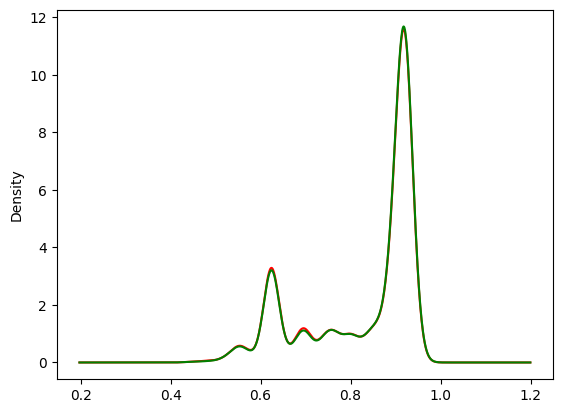

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

## original data 
df['city_development_index'].plot.density(color = 'red')

## after using CCA  
new_df['city_development_index'].plot.density(color = 'green')


<Axes: >

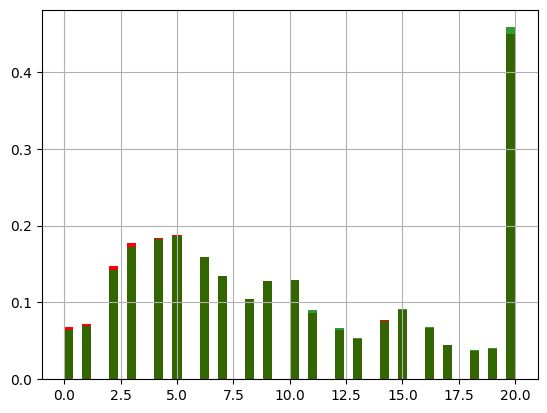

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

## original data 
df['experience'].hist(bins = 50 ,ax = ax , density  =True  ,color = 'red')

## after using CCA  
new_df['experience'].hist(bins = 50 ,ax = ax , density  =True  ,color = 'green',alpha = 0.8)


<Axes: ylabel='Density'>

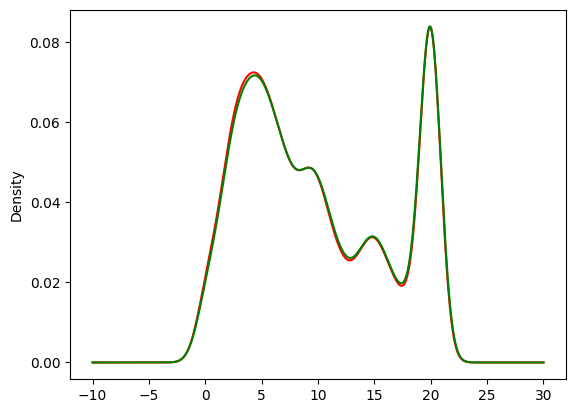

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

## original data 
df['experience'].plot.density(color = 'red')

## after using CCA  
new_df['experience'].plot.density(color = 'green')


In [ ]:
## on categorical dat 

In [31]:
temp = pd.concat([
    df['enrolled_university'].value_counts()/len(df),
    new_df['enrolled_university'].value_counts()/len(df)
],axis =1) 
# temp.columns['original','cca']
temp

,count,count
enrolled_university,,
no_enrollment,0.721213,0.659359
Full time course,0.196106,0.180029
Part time course,0.062533,0.057469


# handling numerical data  

In [1]:
## univariate 


## mean/median imputation 

In [17]:
import numpy as np
import pandas as pd 
from  sklearn.impute import SimpleImputer 
from  sklearn.compose import ColumnTransformer 


In [18]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('titanic_toy.csv')

In [20]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [21]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [22]:
x = df.drop(columns =['Survived'])
y = df['Survived']

In [23]:
X_train,X_test , y_train,y_test = train_test_split(x,y,test_size =0.2 ,random_state = 2)

In [24]:
X_train.shape ,X_test.shape

((712, 3), (179, 3))

In [25]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [26]:
mean_age =X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [27]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [28]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
826,NaN,56.4958,0,28.75,29.785904,56.4958,56.4958
3,35.0,53.1000,1,35.00,35.000000,53.1000,53.1000
148,36.5,26.0000,2,36.50,36.500000,26.0000,26.0000
401,26.0,8.0500,0,26.00,26.000000,8.0500,8.0500
572,36.0,26.3875,0,36.00,36.000000,26.3875,26.3875


In [31]:
print('original age variable varience ',X_train['Age'].var())
print('original age variable varience ',X_train['Age_median'].var())
print('original age variable varience ',X_train['Age_mean'].var())

print('original age variable varience ',X_train['Fare'].var())
print('original age variable varience ',X_train['Fare_median'].var())
print('original age variable varience ',X_train['Fare_mean'].var())


original age variable varience  204.34951339046142
original age variable varience  161.98956633460548
original age variable varience  161.81262452718676
original age variable varience  2448.1979137063163
original age variable varience  2340.09102197536
original age variable varience  2324.2385256705534


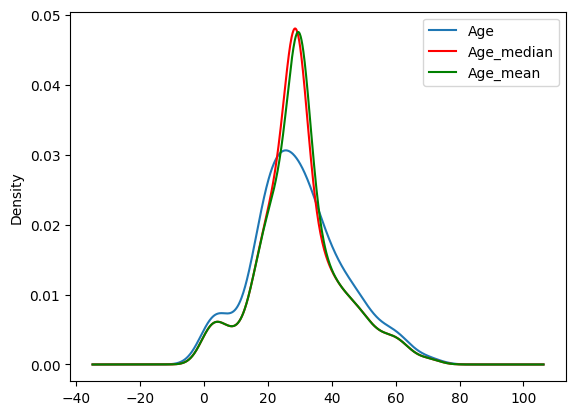

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind = 'kde' ,ax = ax )

X_train['Age_median'].plot(kind = 'kde',ax =ax ,color = 'red')

X_train['Age_mean'].plot(kind = 'kde',ax =ax ,color = 'green')
   
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines ,labels,loc ='best')

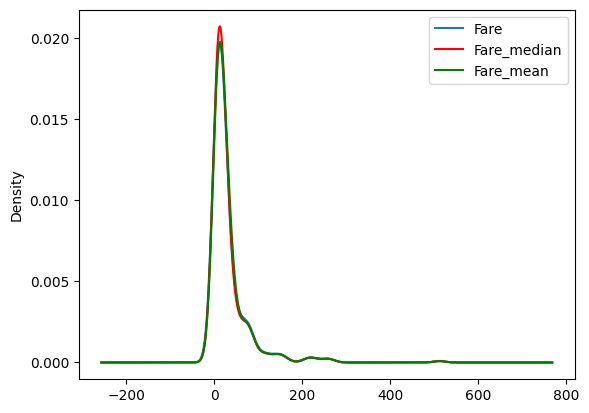

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind = 'kde' ,ax = ax )

X_train['Fare_median'].plot(kind = 'kde',ax =ax ,color = 'red')

X_train['Fare_mean'].plot(kind = 'kde',ax =ax ,color = 'green')
   
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines ,labels,loc ='best')

In [35]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [36]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

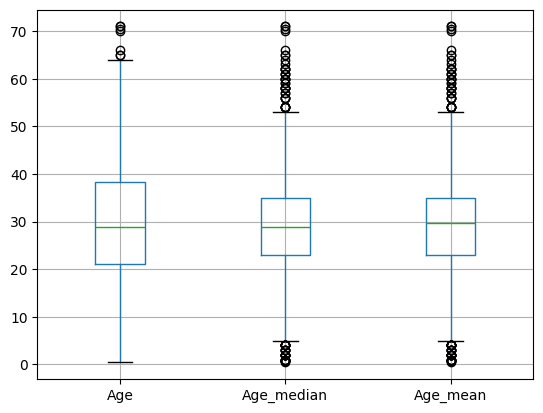

In [38]:
## to idenftify the outliers , IQR 
X_train[['Age','Age_median','Age_mean']].boxplot()

## using sklearn 

In [82]:
X_train , X_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [83]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')


In [84]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder = 'passthrough')

In [85]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [86]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [87]:
trf.named_transformers_['imputer2'].statistics_


array([32.61759689])

In [88]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)


In [89]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

## Arbitray Value  

In [ ]:
## arbitray vlaues means we fix some values like 0, -1 ,99, 100 for all the  null values  which is not present in the data 

In [77]:
import numpy as np
import pandas as pd 
from  sklearn.impute import SimpleImputer 
from  sklearn.compose import ColumnTransformer 


In [78]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('titanic_toy.csv')

In [55]:
X_train,X_test , y_train,y_test = train_test_split(x,y,test_size =0.2 ,random_state = 2)


In [56]:
mean_age =X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [57]:
X_train['Age_median'] = X_train['Age'].fillna(99)
X_train['Ageminus1'] = X_train['Age'].fillna(-1)

X_train['Fare_median'] = X_train['Fare'].fillna(99)
X_train['fareminus1'] = X_train['Fare'].fillna(-1)

In [60]:
print('original age variable varience ',X_train['Age'].var())
print('original age variable varience ',X_train['Age_median'].var())
print('original age variable varience ',X_train['Ageminus1'].var())

print('original age variable varience ',X_train['Fare'].var())
print('original age variable varience ',X_train['Fare_median'].var())
print('original age variable varience ',X_train['fareminus1'].var())


original age variable varience  204.34951339046142
original age variable varience  951.7275570187188
original age variable varience  318.0896202624488
original age variable varience  2448.1979137063163
original age variable varience  2536.0773428319703
original age variable varience  2378.5676784883494


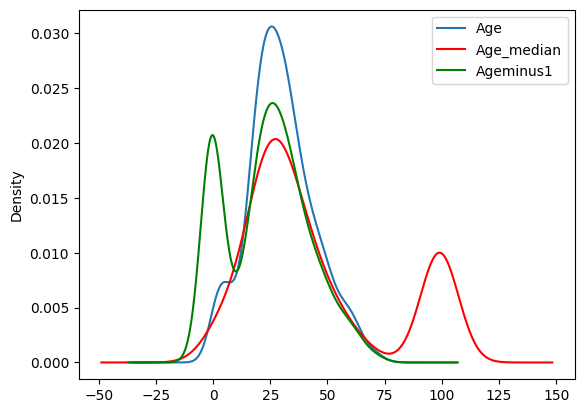

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Age'].plot(kind = 'kde' ,ax = ax )

X_train['Age_median'].plot(kind = 'kde',ax =ax ,color = 'red')

X_train['Ageminus1'].plot(kind = 'kde',ax =ax ,color = 'green')
   
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines ,labels,loc ='best')

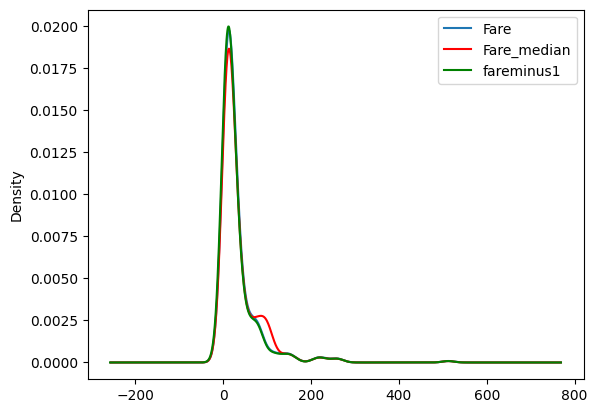

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['Fare'].plot(kind = 'kde' ,ax = ax )

X_train['Fare_median'].plot(kind = 'kde',ax =ax ,color = 'red')

X_train['fareminus1'].plot(kind = 'kde',ax =ax ,color = 'green')
   
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines ,labels,loc ='best')

## using sklearn

In [64]:
X_train,X_test , y_train,y_test = train_test_split(x,y,test_size =0.2 ,random_state = 2)


In [66]:
imputer1 = SimpleImputer(strategy = 'constant',fill_value=99)
imputer2 = SimpleImputer(strategy = 'constant',fill_value = 999)


In [67]:
trf.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [75]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder = 'passthrough')

In [90]:
trf.named_transformers_['imputer1'].statistics_


array([28.75])

In [91]:
trf.named_transformers_['imputer2'].statistics_


array([32.61759689])

### upper concept is used when the data is not missing at random 


## end of distibution imputation

In [94]:
# in this we generly use the end value of the distrbution , normally the formula is that 
# mean +3*sigma   sigma = standard devation 
# of mean - 3*sigma 
# it fill basiclly the outliers 

In [ ]:
## 

# handling categorical data 

In [ ]:
# 1 most frequent 
# 2. random value  or write missing 
## modeis used in categorical data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('train2.csv',usecols = ['GarageQual','FireplaceQu','SalePrice'])

In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [13]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

Text(0, 0.5, 'number of hours')

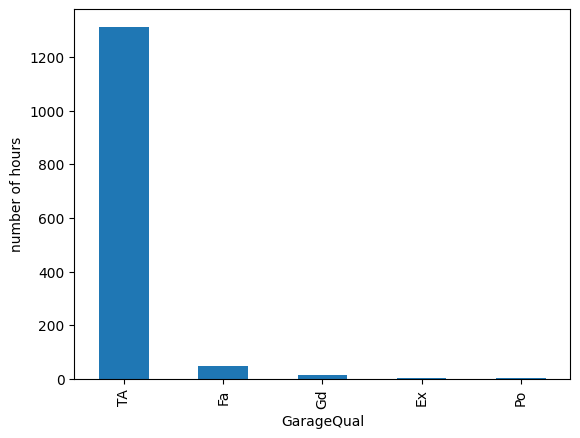

In [15]:
df['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('number of hours')

In [16]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

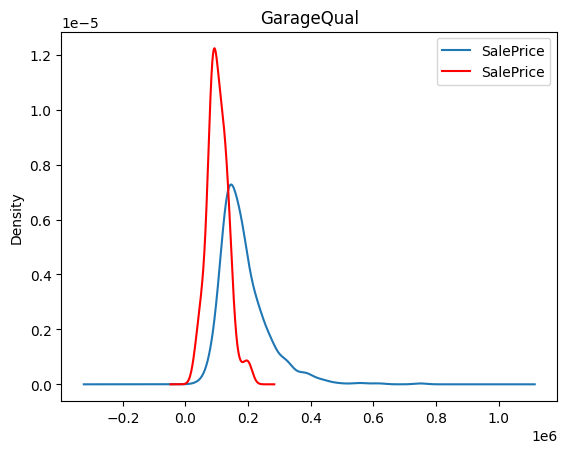

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind = 'kde',ax = ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde',ax = ax,color = 'red')

lines ,labels = ax.get_legend_handles_labels()
label = ['Hours with TA','Hours with NA']
ax.legend(lines,labels,loc ='best')

plt.title('GarageQual')

In [22]:
temp = df[df['GarageQual']=='TA']['SalePrice']


In [23]:
df['GarageQual'].fillna('TA',inplace =True)

<Axes: xlabel='GarageQual'>

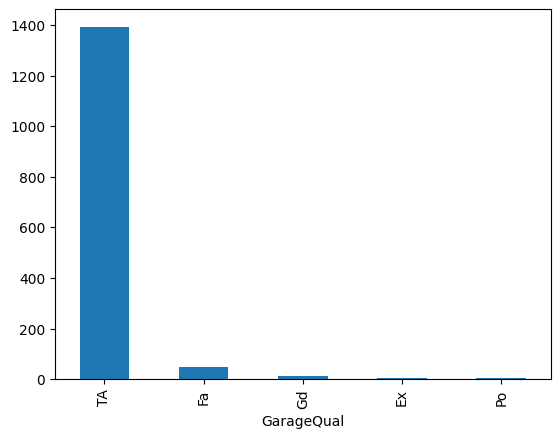

In [26]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

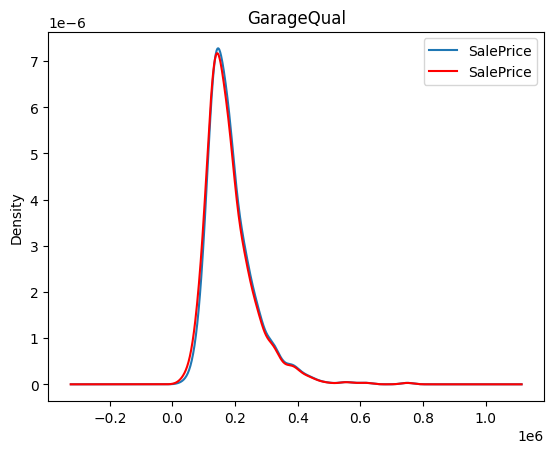

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind ='kde',ax =ax)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind = 'kde',ax = ax,color = 'red')

lines ,labels = ax.get_legend_handles_labels()
label = ['original','imputed with TA']
ax.legend(lines,labels,loc ='best')

plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

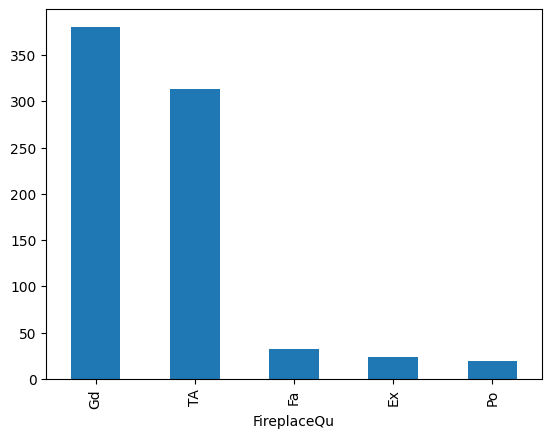

In [31]:
df['FireplaceQu'].value_counts().plot(kind ='bar') ## most frequent value must be dominating all the others values then we can use the concept of the mode 

Text(0.5, 1.0, 'FireplaceQu')

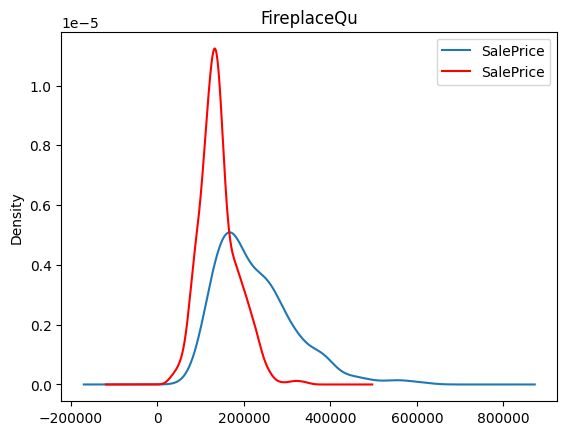

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind = 'kde',ax = ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind = 'kde',ax = ax,color = 'red')

lines ,labels = ax.get_legend_handles_labels()
label = ['Hours with TA','Hours with NA']
ax.legend(lines,labels,loc ='best')

plt.title('FireplaceQu')

In [34]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']


In [35]:
df['FireplaceQu'].fillna('Gd',inplace =True)


<Axes: xlabel='FireplaceQu'>

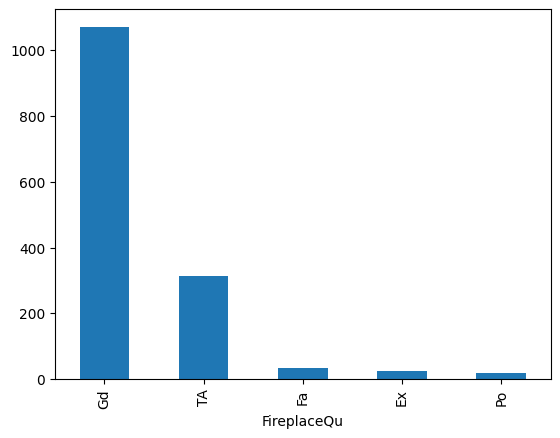

In [36]:
df['FireplaceQu'].value_counts().plot(kind='bar')


Text(0.5, 1.0, 'FireplaceQu')

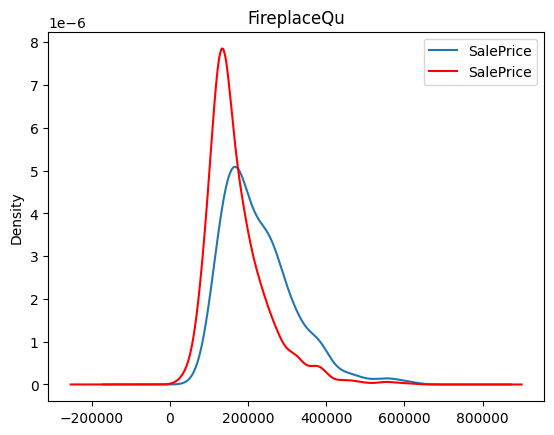

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind ='kde',ax =ax)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind = 'kde',ax = ax,color = 'red')

lines ,labels = ax.get_legend_handles_labels()
label = ['original','imputed with GD']
ax.legend(lines,labels,loc ='best')

plt.title('FireplaceQu')

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size =0.20)

In [39]:
from sklearn.impute import SimpleImputer


In [40]:
imp1 = SimpleImputer(strategy='most_frequent')


In [42]:
X_train = imp1 .fit_transform(X_train)
X_test = imp1.transform(X_train)

In [43]:
imp1.statistics_

array(['Gd', 'TA'], dtype=object)

### missing catego imputation 

In [ ]:
df['GarageQual'].fillna('Missing',inplace=True)

In [46]:
# by sklearn 
from sklearn.impute import SimpleImpuer 
imputer =  SimpleImputer (strategy='constant',fill_value='Missing')

ImportError: cannot import name 'SimpleImpuer' from 'sklearn.impute' (/home/anubhav/.local/lib/python3.10/site-packages/sklearn/impute/__init__.py)

#  random impuation 

In [ ]:
# in this method we randomlly select the data from the same row , which is already present in the column

In [ ]:
### it can be apply on numerical as welll as categorical data 

In [49]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import seaborn as sns 

In [50]:
df  =pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [51]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [52]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [53]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [56]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)


In [58]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [65]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

In [66]:
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [69]:
X_train['Age_imputed'].isnull().sum()

0

In [70]:
X_train

,Age,Fare,Age_imputed
616,34.0,14.4000,34.0
678,43.0,46.9000,43.0
487,58.0,29.7000,58.0
762,20.0,7.2292,20.0
590,35.0,7.1250,35.0
...,...,...,...
181,NaN,15.0500,50.0
794,25.0,7.8958,25.0
301,NaN,23.2500,7.0
86,16.0,34.3750,16.0


/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


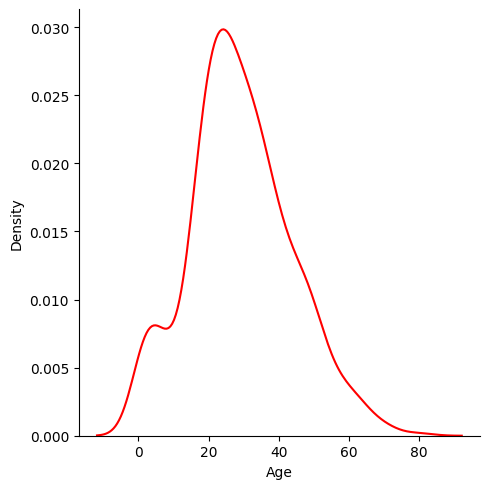

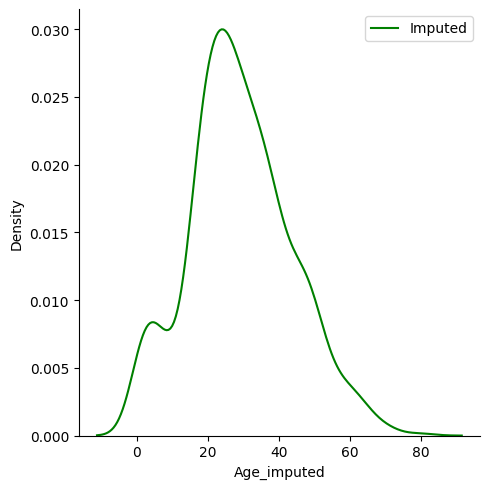

In [77]:
sns.displot(X_train['Age'], label='Original', kind='kde',color='red')
sns.displot(X_train['Age_imputed'], label='Imputed', kind='kde',color='green')

plt.legend()
plt.show()


/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anubhav/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


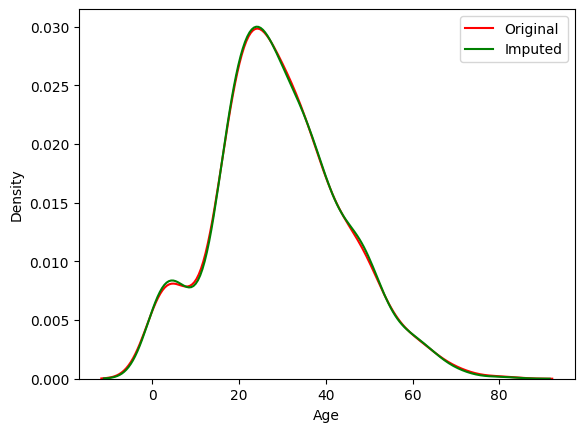

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot both distributions on a single graph
sns.kdeplot(X_train['Age'], label='Original', color='red')
sns.kdeplot(X_train['Age_imputed'], label='Imputed', color='green')

plt.legend()
plt.show()


In [82]:
X_train['Age'].var() , X_train['Age_imputed'].var()

(209.11132427540326, 207.85307544920116)

In [84]:
X_train[['Fare','Age','Age_imputed']].cov()


,Fare,Age,Age_imputed
Fare,2722.634652,62.728571,42.028529
Age,62.728571,209.111324,209.111324
Age_imputed,42.028529,209.111324,207.853075


<Axes: >

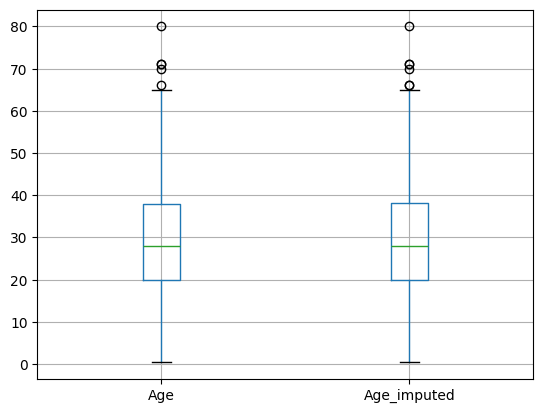

In [85]:
X_train[['Age','Age_imputed']].boxplot()


In [88]:
sampled_value = X_train['Age'].dropna().sample(1,random_state=int(observation['Fare'])) # we fix the the state 

NameError: name 'observation' is not defined

## categorical data  random imputation 

In [89]:
data = pd.read_csv('train2.csv',usecols =['GarageQual','FireplaceQu','SalePrice'])

In [90]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [91]:
data.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [92]:
x = data
y = data['SalePrice']

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =2)

In [96]:
x_train['GaregeQual_imputed'] = x_train['GarageQual']
x_test['GaregeQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']


In [98]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GaregeQual_imputed,FireplaceQu_imputed
293,TA,TA,235000,TA,TA
1391,NaN,TA,124000,TA,NaN
64,NaN,TA,219500,TA,NaN
43,NaN,TA,130250,TA,NaN
1162,Po,TA,129000,TA,Po


In [100]:
x_train['GaregeQual_imputed'][x_train['GaregeQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GaregeQual_imputed'][x_test['GaregeQual_imputed'].isnull()] = x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_test['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

/tmp/ipykernel_4582/1935378628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['GaregeQual_imputed'][x_train['GaregeQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
/tmp/ipykernel_4582/1935378628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['GaregeQual_imputed'][x_test['GaregeQual_imputed'].isnull()] = x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values
/tmp/ipykernel_4582/1935378628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

In [102]:
temp = pd.concat([
    x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
    x_train['GaregeQual_imputed'].value_counts()/len(x_train)
],
axis = 1)
temp.columns = ['original','imputed']

In [103]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [104]:
temp = pd.concat([
    x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
    x_train['FireplaceQu_imputed'].value_counts()/len(x_train)
],
axis = 1)
temp.columns = ['original','imputed']

In [105]:
temp

,original,imputed
Gd,0.494272,0.496575
TA,0.412439,0.409247
Fa,0.040917,0.040240
Po,0.027823,0.029110
Ex,0.024550,0.024829


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values and plot KDE plots for each category
sns.displot(data=x_train.dropna(), x='SalePrice', hue='FireplaceQu', kind='kde')

plt.legend(title='Fireplace Quality')
plt.show()


ValueError: Could not interpret value `SalePrice` for parameter `x`

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values and plot KDE plots for each category
sns.displot(data=x_train.dropna(), x='SalePrice', hue='FireplaceQu_imputed', kind='kde')

plt.legend(title='Fireplace Quality')
plt.show()


ValueError: Could not interpret value `SalePrice` for parameter `x`

## missing indcator techinque 

In [80]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split 

from sklearn.impute import MissingIndicator,SimpleImputer


In [81]:
df = pd.read_csv('train.csv',usecols =['Age','Fare','Survived'])

In [82]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [84]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =2)

In [86]:
x_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [87]:
si = SimpleImputer()
x_train_trf  =  si.fit_transform(x_train)
x_test_trf = si.transform(x_test)

In [88]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train_trf,y_train)

y_pred =clf.predict(x_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [89]:
mi = MissingIndicator()
mi.fit(x_train)

MissingIndicator()

In [90]:
x_train_missing = mi.fit_transform(x_train)

x_test_missing = mi.transform(x_test)

In [95]:
x_train['Age_na'] = x_train_missing
x_test['Age_na'] = x_test_missing


In [96]:
x_train

,Age,Fare,Age_na
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False
...,...,...,...
534,30.0,8.6625,False
584,NaN,8.7125,True
493,71.0,49.5042,False
527,NaN,221.7792,True


In [97]:
si = SimpleImputer()

x_train_trf2 = si.fit_transform(x_train)
x_test_trf2 = si.transform(x_test)

In [98]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train_trf2,y_train)

y_pred = clf.predict(x_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

In [ ]:
 ## without using missing idicator 
si = SimpleImputer(add_indicator = True)

## Automatically selectvalue for imputaton

In [99]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression


In [100]:


df = pd.read_csv('train.csv')

df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [102]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [104]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [105]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [106]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [107]:
from sklearn import set_config

set_config(display='diagram')
clf


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [108]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [109]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [110]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")


Internal CV score: 0.788


In [112]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]



,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.787852
5,1.0,most_frequent,median,0.787852
6,1.0,constant,mean,0.787852
7,1.0,constant,median,0.787852
8,10,most_frequent,mean,0.787852
9,10,most_frequent,median,0.787852
10,10,constant,mean,0.787852
11,10,constant,median,0.787852
12,100,most_frequent,mean,0.787852
13,100,most_frequent,median,0.787852
